# Rainfall Weather Forecasting

Project Description

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:
Number of columns: 23


Date  - The date of observation
Location  -The common name of the location of the weather station
MinTemp  -The minimum temperature in degrees celsius
MaxTemp -The maximum temperature in degrees celsius
Rainfall  -The amount of rainfall recorded for the day in mm
Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
Sunshine  -The number of hours of bright sunshine in the day.
WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight
WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
WindDir9am -Direction of the wind at 9am
WindDir3pm -Direction of the wind at 3pm
WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
Humidity9am -Humidity (percent) at 9am
Humidity3pm -Humidity (percent) at 3pm
Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm
Cloud9am - Fraction of sky obscured by cloud at 9am. 
Cloud3pm -Fraction of sky obscured by cloud 
Temp9am-Temperature (degrees C) at 9am
Temp3pm -Temperature (degrees C) at 3pm
RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".


In [1]:
#import key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings ('ignore')

In [2]:
data = pd.read_csv("weatherAUS.csv")
pd.set_option("display.max_columns",None)

In [3]:
data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


Here, there is multiple NaN values present in the dataset. Also, target 1 (predicting whether or not it will rain tomorrow) will be a logistic regression/classification problem

In [5]:
data.shape

(8425, 23)

In [7]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [8]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

Combination of object and float data types. Rain tomorrow is object so will need to use classification algorithms such as logistic regresison

In [9]:
#Checking null values
data.isnull()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
2,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
4,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
8421,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
8422,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
8423,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
#Checking wherer the null values are present
data.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

Lots of null values present in the data set which we will fill using mean, medium or mode depending on the data types 

In [11]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [12]:
# Dealing with NaN values in Numerical columns 
columns_to_fill = ["MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine", "WindGustSpeed", 
                   "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", 
                   "Pressure3pm", "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm"]

data[columns_to_fill] = data[columns_to_fill].fillna(data[columns_to_fill].mean())

In [16]:
# Dealing with NaN values in Catagorical columns 
columns_to_fill_cat = ["WindGustDir", "WindDir9am", "WindDir3pm", "RainToday", "RainTomorrow"]

data[columns_to_fill_cat] = data[columns_to_fill_cat].fillna(data[columns_to_fill_cat].mode().iloc[0])


In [17]:
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

No null values present anymore

In [18]:
#checking the unique values
data.nunique()

Date             3004
Location           12
MinTemp           286
MaxTemp           332
Rainfall          251
Evaporation       117
Sunshine          141
WindGustDir        16
WindGustSpeed      53
WindDir9am         16
WindDir3pm         16
WindSpeed9am       35
WindSpeed3pm       36
Humidity9am        91
Humidity3pm        95
Pressure9am       385
Pressure3pm       375
Cloud9am           10
Cloud3pm           10
Temp9am           305
Temp3pm           329
RainToday           2
RainTomorrow        2
dtype: int64

In [19]:
data.shape

(8425, 23)

In [20]:
# I will reduce the size of the dataset by removing duplicate values.
data=data.drop_duplicates()

In [21]:
data.shape

(6762, 23)

In [22]:
Dataloss=((8425-6762)/8425)*100
Dataloss

19.73887240356083

19% of the dataset consisted of duplicate values

In [26]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

PerthAirport    1204
Albury           907
Newcastle        822
Melbourne        811
Williamtown      615
CoffsHarbour     611
Brisbane         579
Penrith          482
Darwin           250
Wollongong       237
Adelaide         205
Uluru             39
Name: Location, dtype: int64


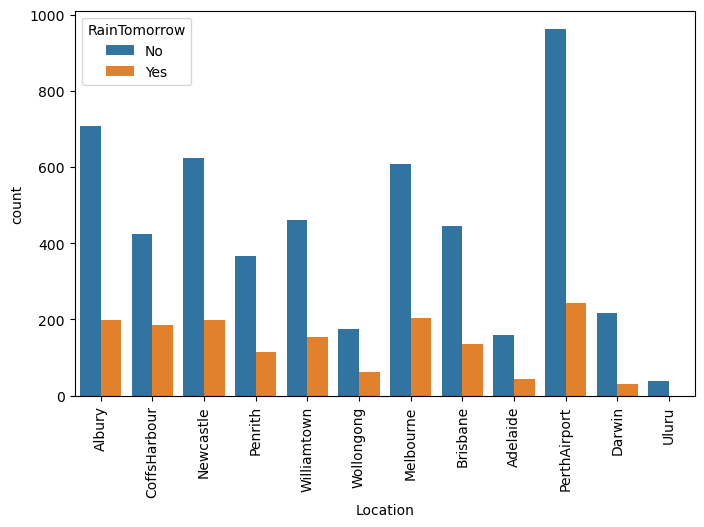

In [30]:
#explore features in relation with target 
print(data["Location"].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(data["Location"],hue=data["RainTomorrow"])
plt.xticks(rotation=90)
plt.show()

Perth airport has the higheset count as well as chance of rain tomorrow, followed by Albury. Uluru has smallest count and liklihood of rain tomorrow. 

N      1401
E       518
SW      465
W       434
WSW     420
WNW     398
SSE     390
S       376
SE      370
ENE     357
NE      300
SSW     299
NW      296
NNE     287
ESE     267
NNW     184
Name: WindGustDir, dtype: int64


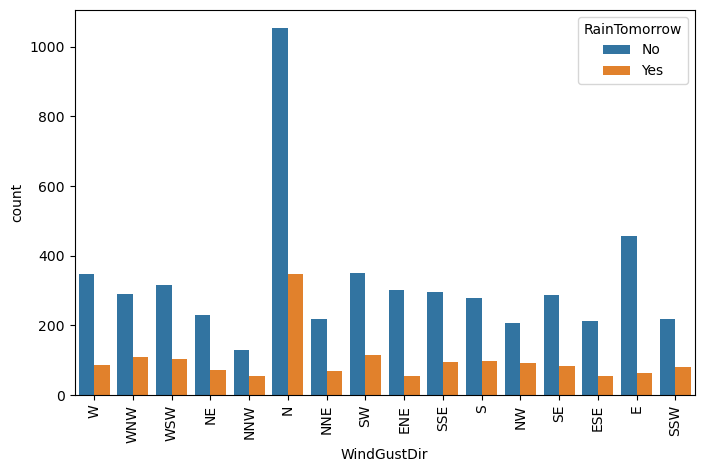

In [31]:
print(data["WindGustDir"].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(data["WindGustDir"],hue=data["RainTomorrow"])
plt.xticks(rotation=90)
plt.show()

North has the highest count and wind direction from here increases the chances of rain tomorrow

N      1403
SW      590
NW      463
SE      439
ENE     397
WSW     394
SSW     368
NE      364
E       338
NNE     337
S       324
WNW     301
SSE     300
W       299
ESE     229
NNW     216
Name: WindDir9am, dtype: int64


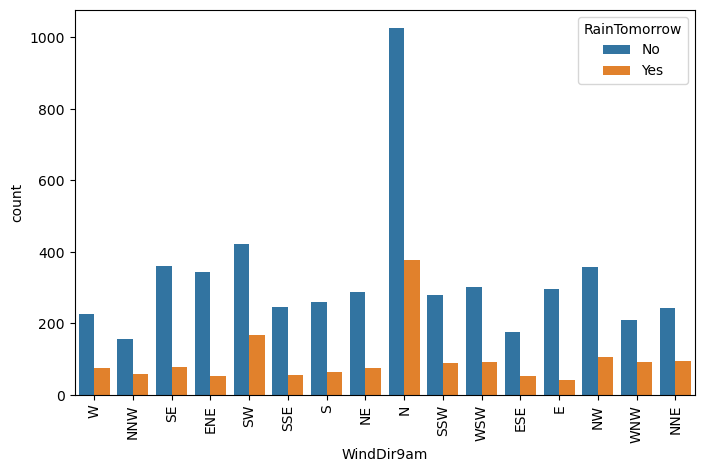

In [32]:
print(data["WindDir9am"].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(data["WindDir9am"],hue=data["RainTomorrow"])
plt.xticks(rotation=90)
plt.show()

Similar to the previous findings

SE     971
WSW    499
S      493
NE     480
SW     428
SSE    421
NW     400
W      399
E      392
WNW    389
ESE    363
N      354
ENE    348
NNE    305
SSW    277
NNW    243
Name: WindDir3pm, dtype: int64


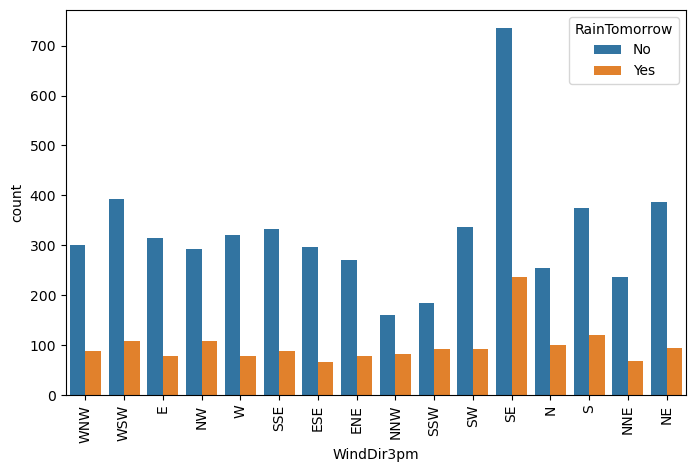

In [33]:
print(data["WindDir3pm"].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(data["WindDir3pm"],hue=data["RainTomorrow"])
plt.xticks(rotation=90)
plt.show()

The maximum probability of rain tomorrow is from the South East Direction (As is the count) and the least is from North North West

No     5190
Yes    1572
Name: RainToday, dtype: int64


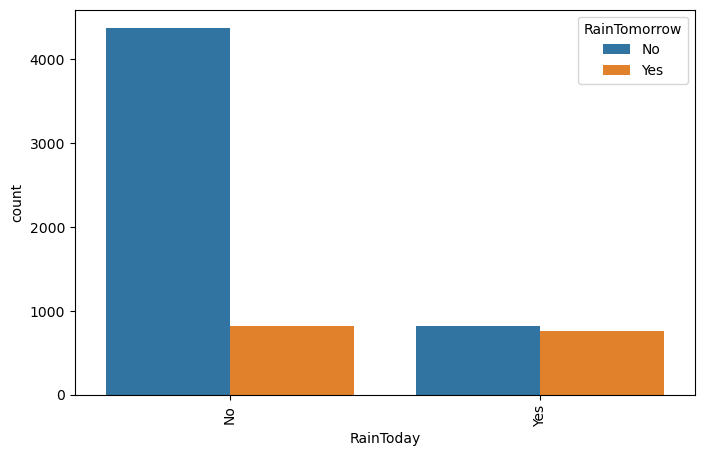

In [34]:
print(data["RainToday"].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(data["RainToday"],hue=data["RainTomorrow"])
plt.xticks(rotation=90)
plt.show()

This shows that when there is rain today, there is a significant probability of rain tomorrow (almost equal)

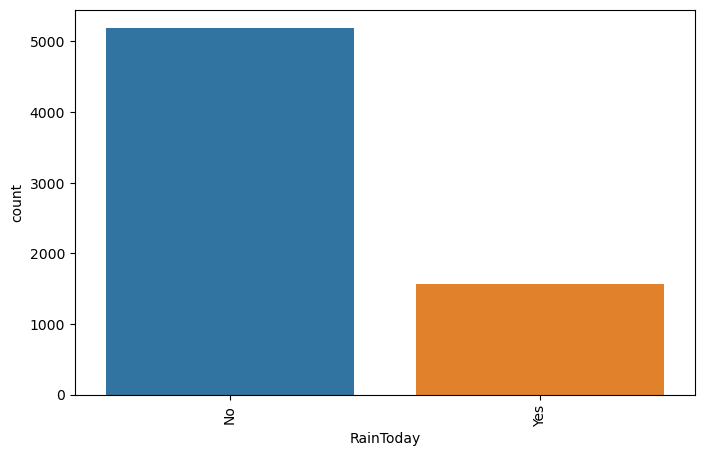

In [35]:
plt.figure(figsize=(8,5))
sns.countplot(data['RainToday'])
plt.xticks(rotation=90)
plt.show()

No has a higher count than yes in terms of whether there is a chance of rain today

In [36]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [37]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

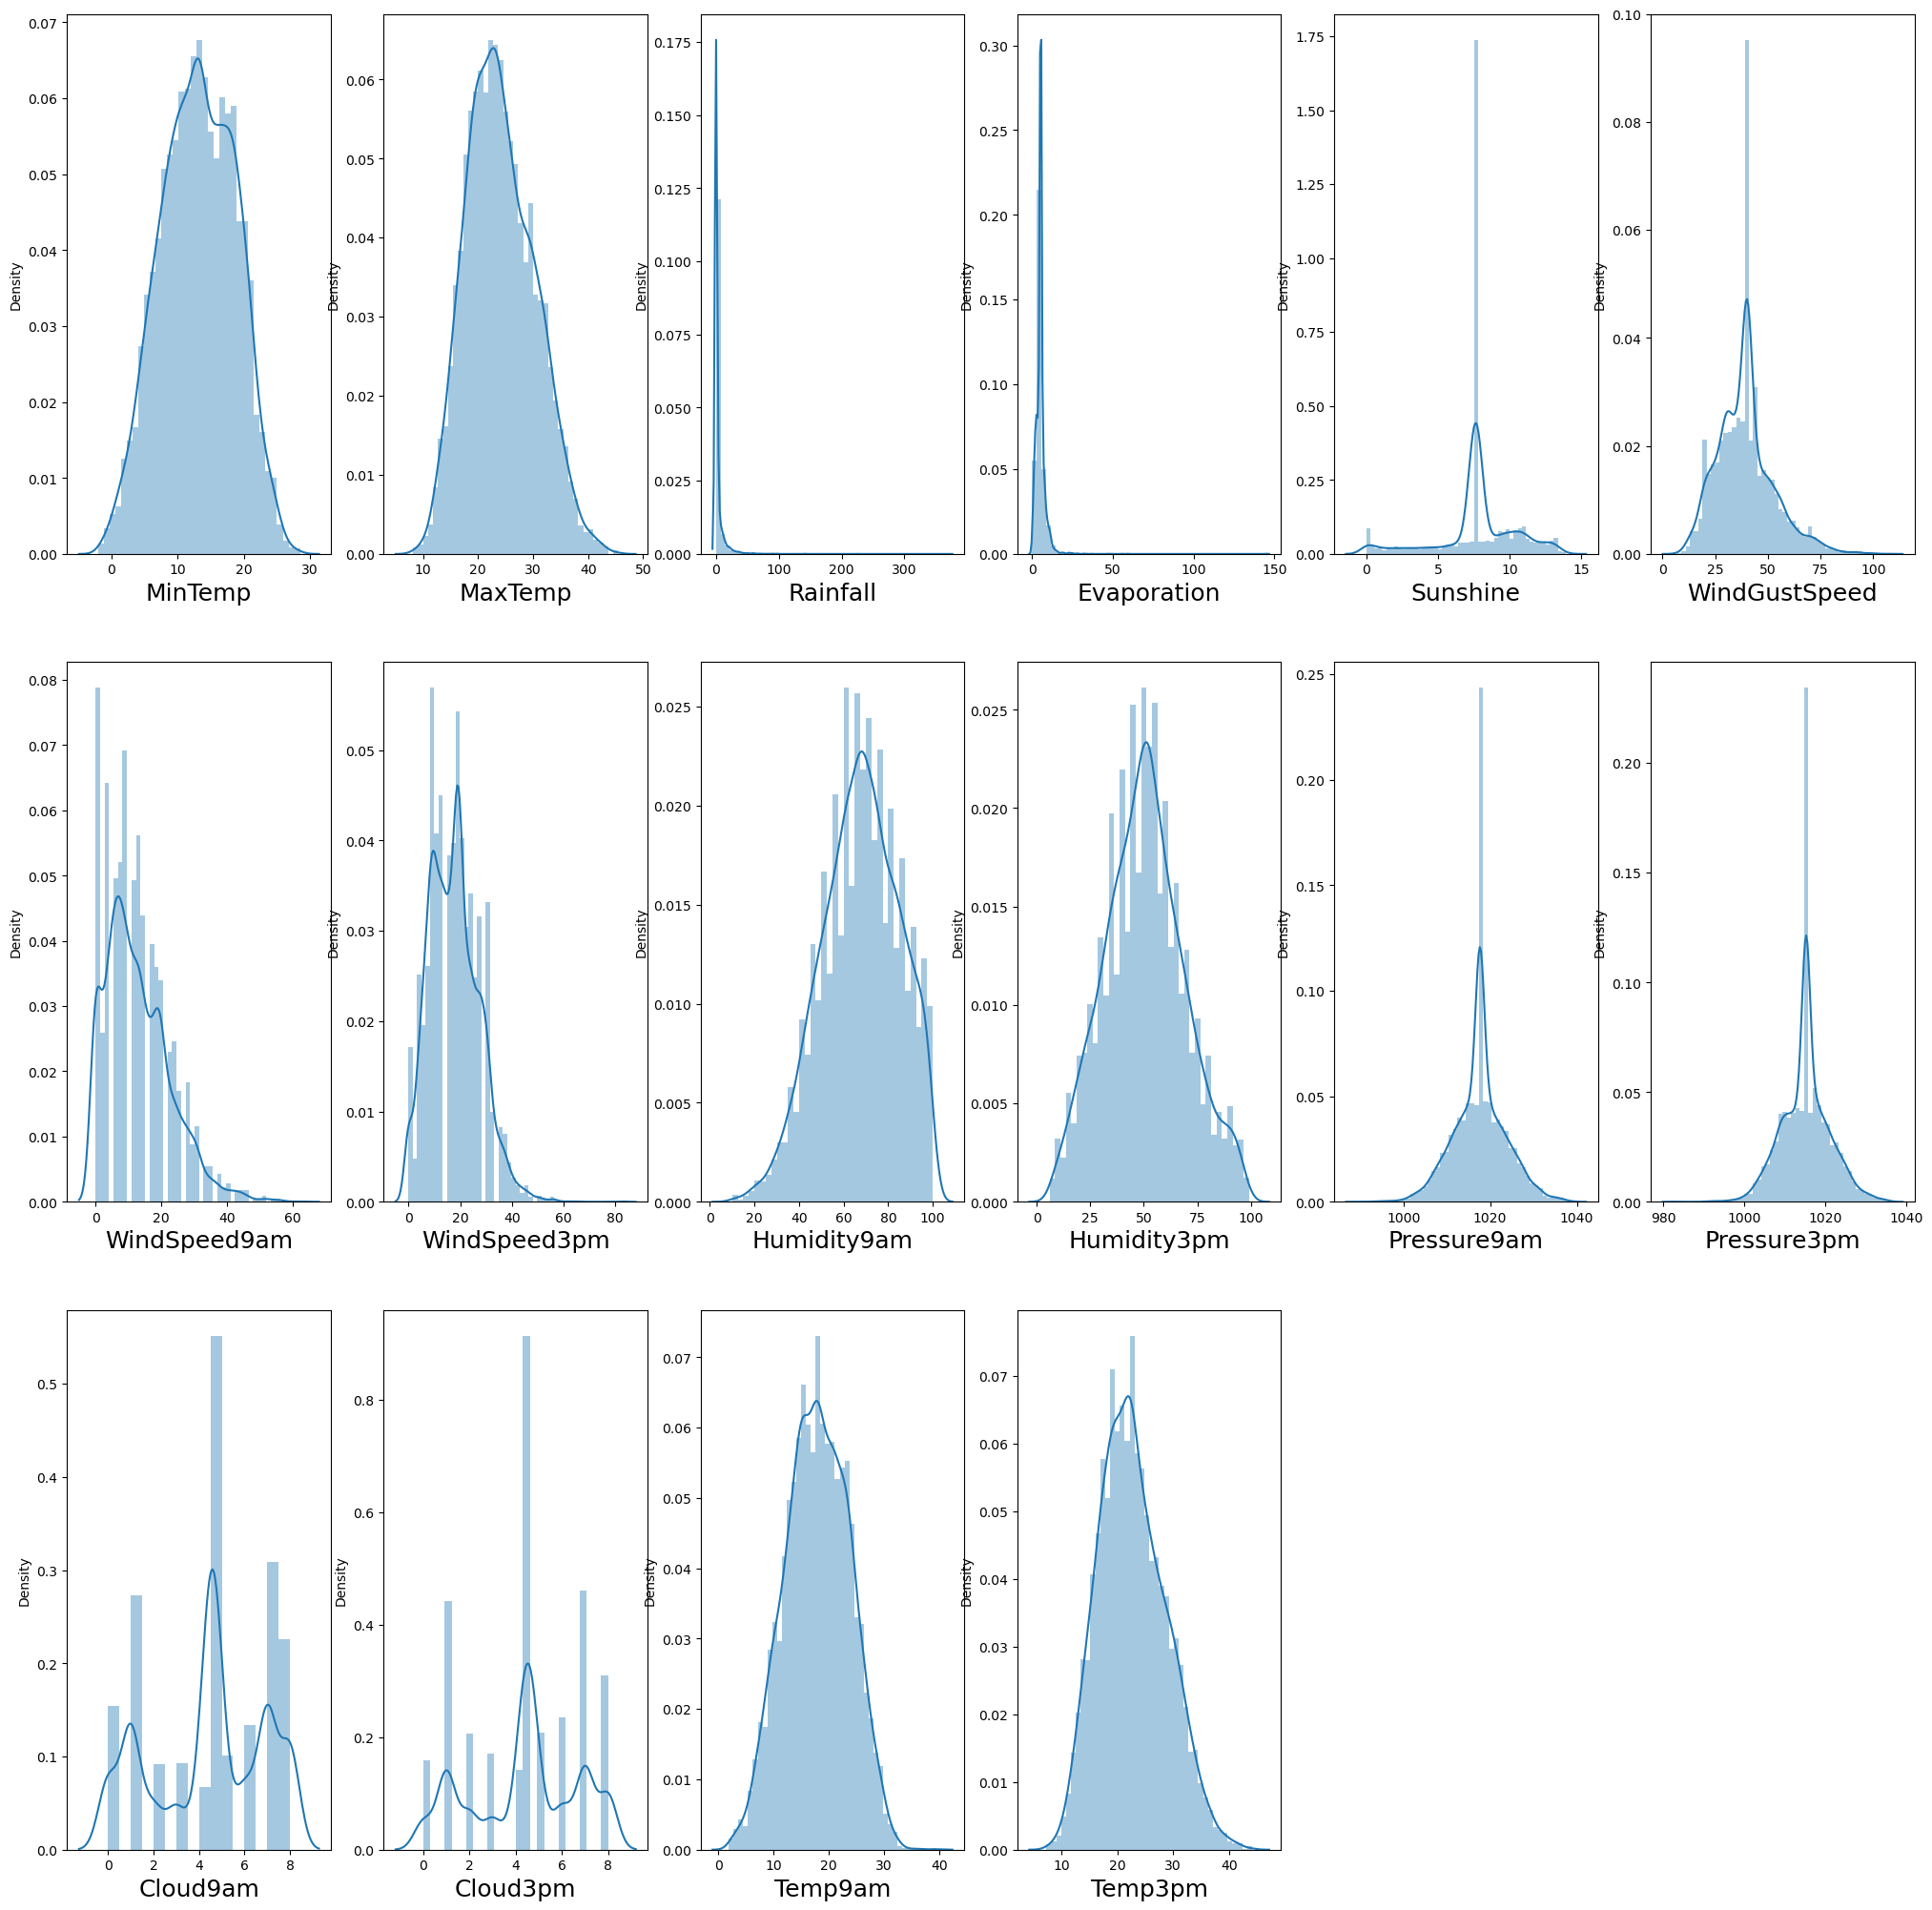

In [40]:
#Check the distribution in the numerical columns 
columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']

plotnumber = 1
plt.figure(figsize=(25,25))
for column in columns:
    if plotnumber <= 17:
        ax = plt.subplot(3, 6, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=18)
        plotnumber += 1

plt.show()

We can see left skew in rainfall and evaporation which we can treat with power transform. The other columns are fairly normal in their distribution.

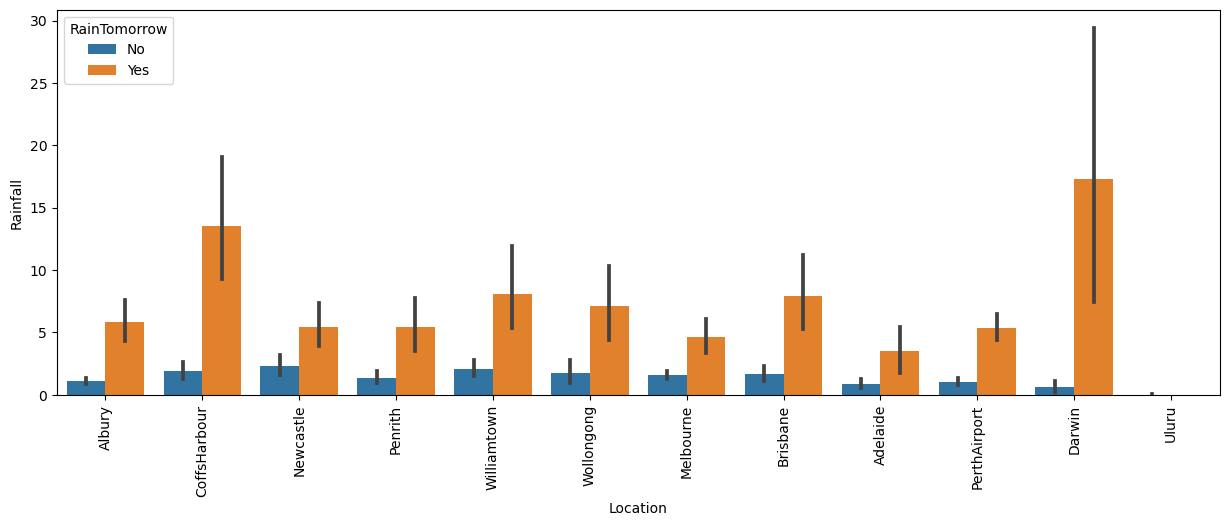

In [54]:
#compaing different features with target
plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
sns.barplot(x='Location', y='Rainfall', hue='RainTomorrow', data=data)
plt.show()


Darwin and CoffsHarbour have the highest chances of rainfall tommorrow and Uluru has the lowest chance

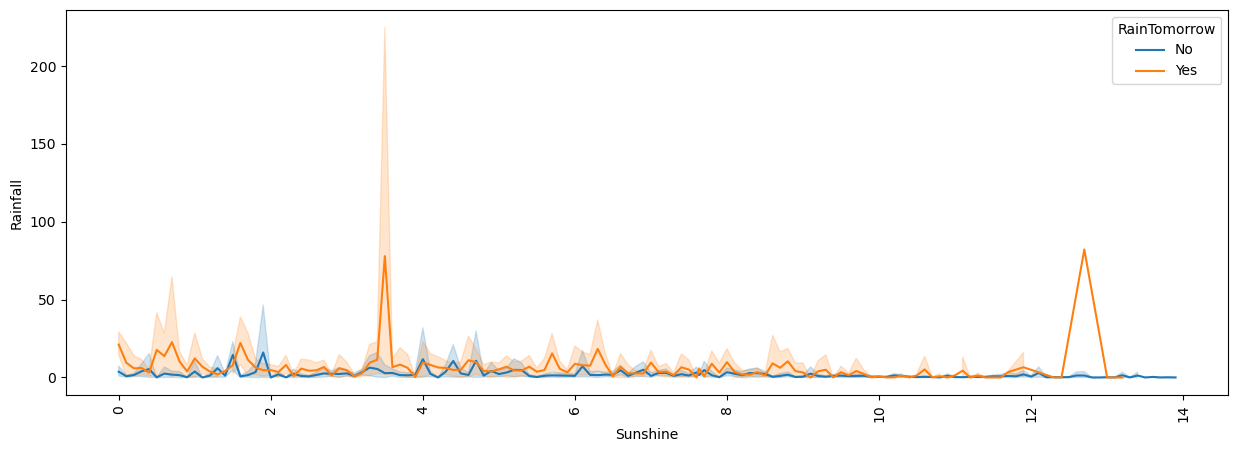

In [55]:
#comparing different features with target
plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
sns.lineplot(x='Sunshine', y='Rainfall', hue='RainTomorrow', data=data)
plt.show()


The probability of rainfall drops after 4 hours of sunshine with an exeption  at 13 hours 

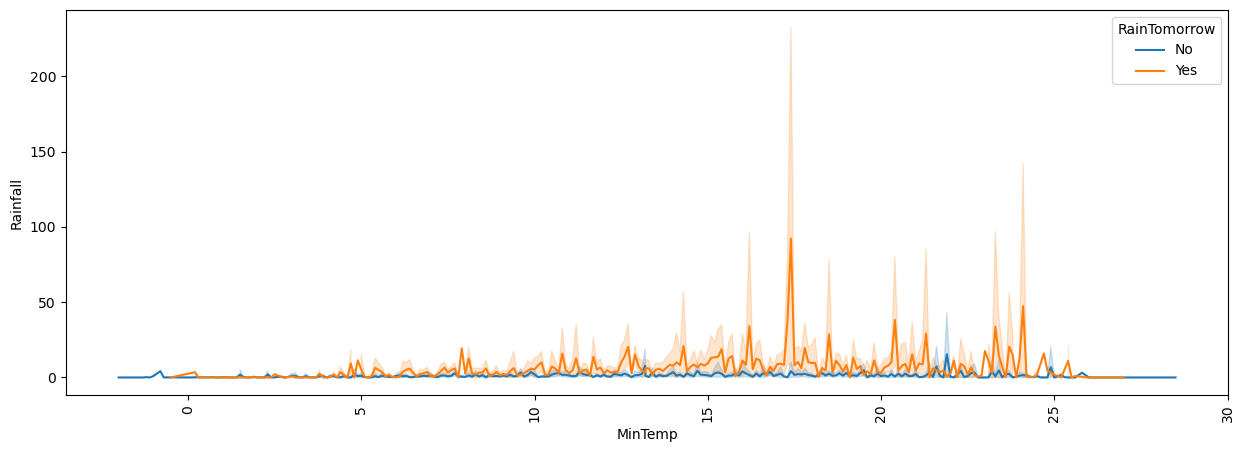

In [56]:
#comparing different features with target
plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
sns.lineplot(x='MinTemp', y='Rainfall', hue='RainTomorrow', data=data)
plt.show()


In [47]:
print(data["MinTemp"].value_counts())

 13.193305    70
 13.200000    58
 12.000000    57
 14.800000    53
 12.700000    53
              ..
-1.200000      1
-1.500000      1
-1.700000      1
-0.800000      1
 26.000000     1
Name: MinTemp, Length: 286, dtype: int64


When the Min temperature is approximately 13 degrees, the chance of rain is at its highest

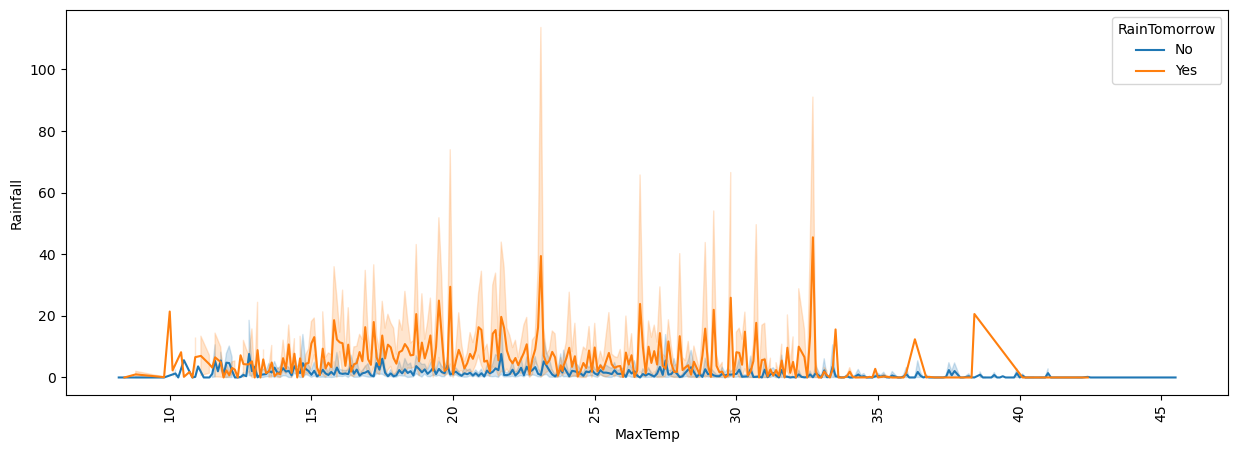

In [57]:
#comparing different features with target
plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
sns.lineplot(x='MaxTemp', y='Rainfall', hue='RainTomorrow', data=data)
plt.show()

In [49]:
print(data["MaxTemp"].value_counts())

19.000000    66
19.800000    62
23.859976    57
23.800000    54
22.300000    54
             ..
10.300000     1
10.000000     1
10.400000     1
11.700000     1
43.500000     1
Name: MaxTemp, Length: 332, dtype: int64


Large spikes in data. Highest amount of spikes are between 20-35

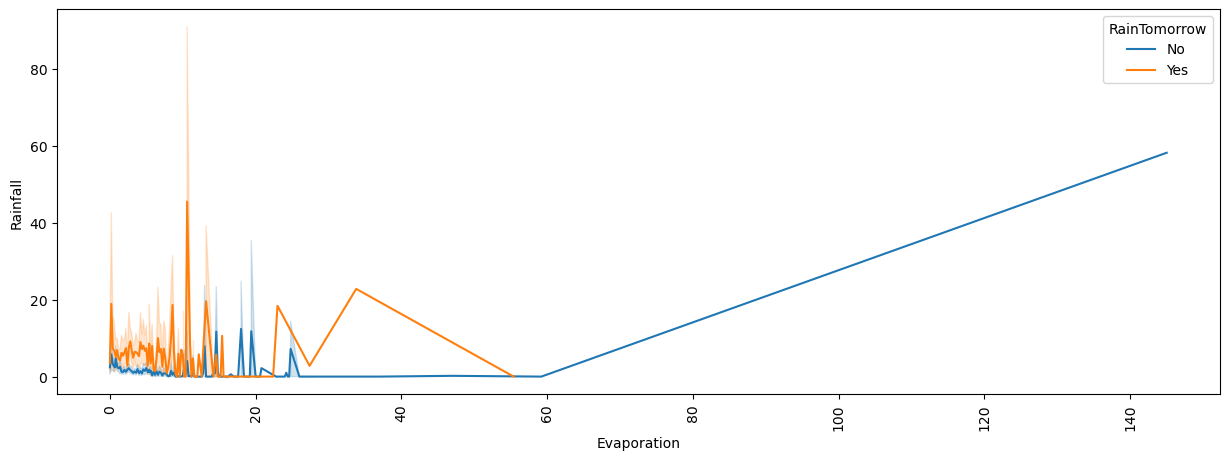

In [58]:
#comparing different features with target
plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
sns.lineplot(x='Evaporation', y='Rainfall', hue='RainTomorrow', data=data)
plt.show()

Unsurprisingly, low amounts of evaporation increase chances of rain. When evaporation reaches 60, there is no chance of rain

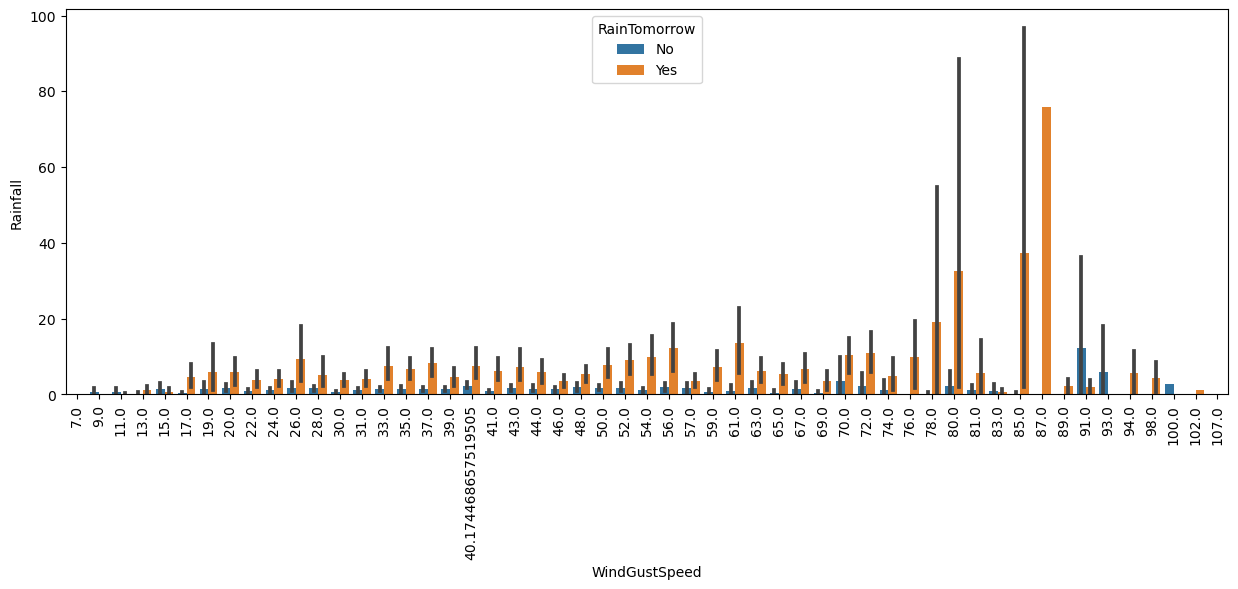

In [59]:
#comparing different features with target
plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
sns.barplot(x='WindGustSpeed', y='Rainfall', hue='RainTomorrow', data=data)
plt.show()

Wind speeds of 87 yield the highest chances, but between 80-87 is high generally. Low wind speeds equate to low chances of rainfall

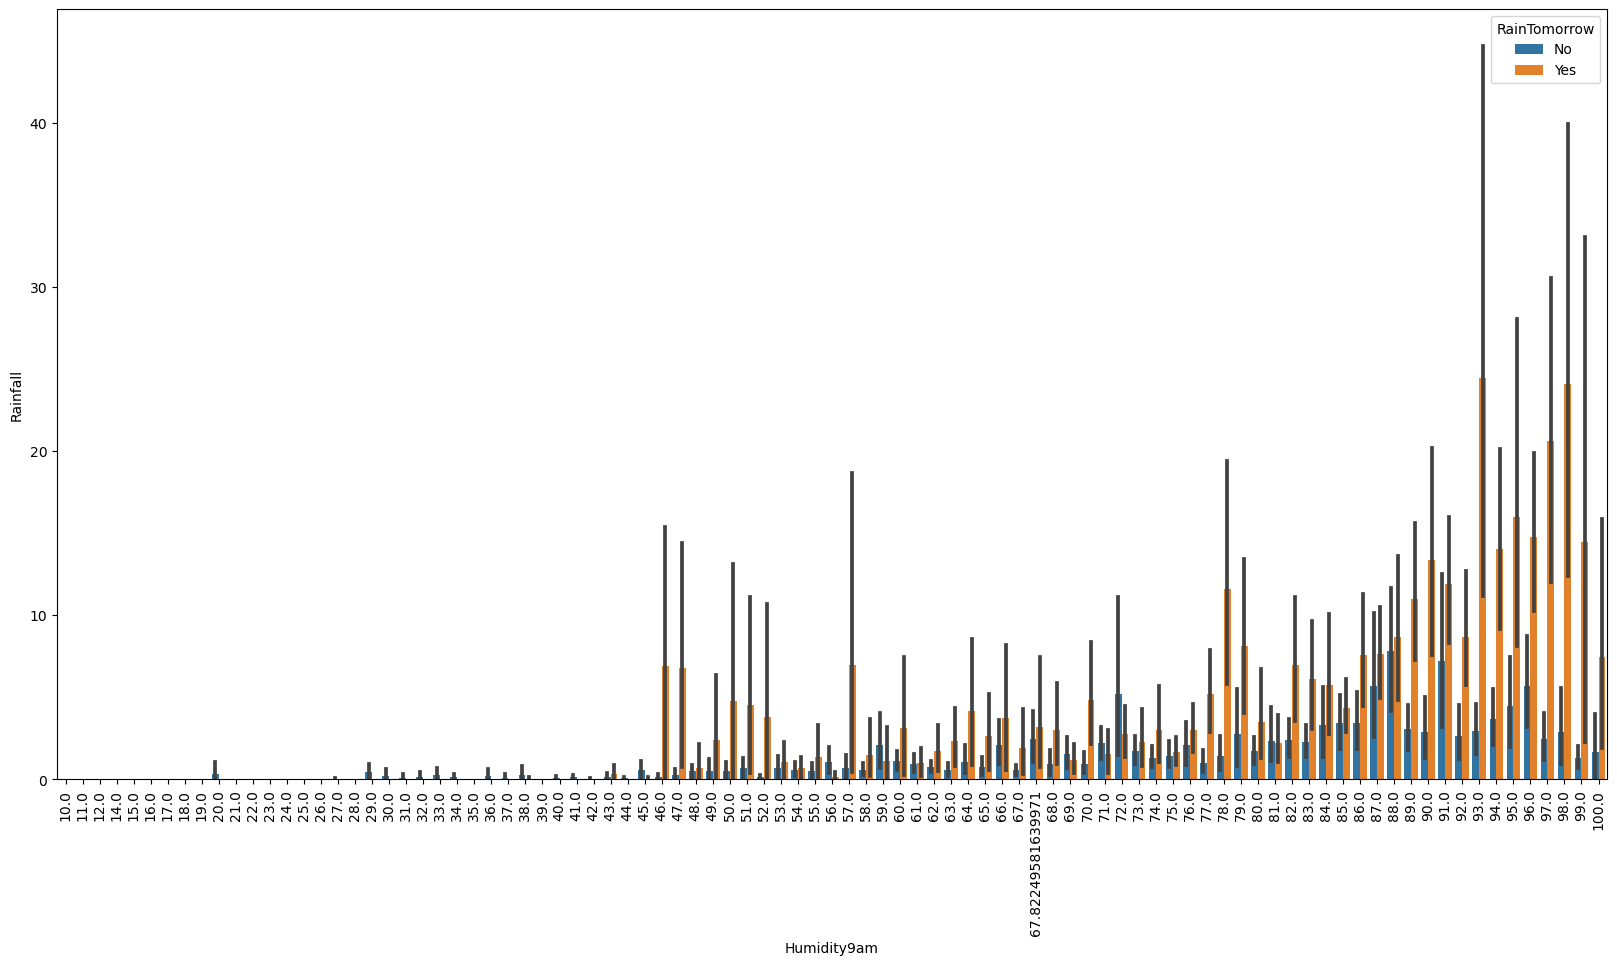

In [61]:
#comparing different features with target 
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.barplot(x='Humidity9am', y='Rainfall', hue='RainTomorrow', data=data)
plt.show()

There is a clear linear relationship; the higher the humidity the higher the chances of rainfall. 80-100 was the highest.

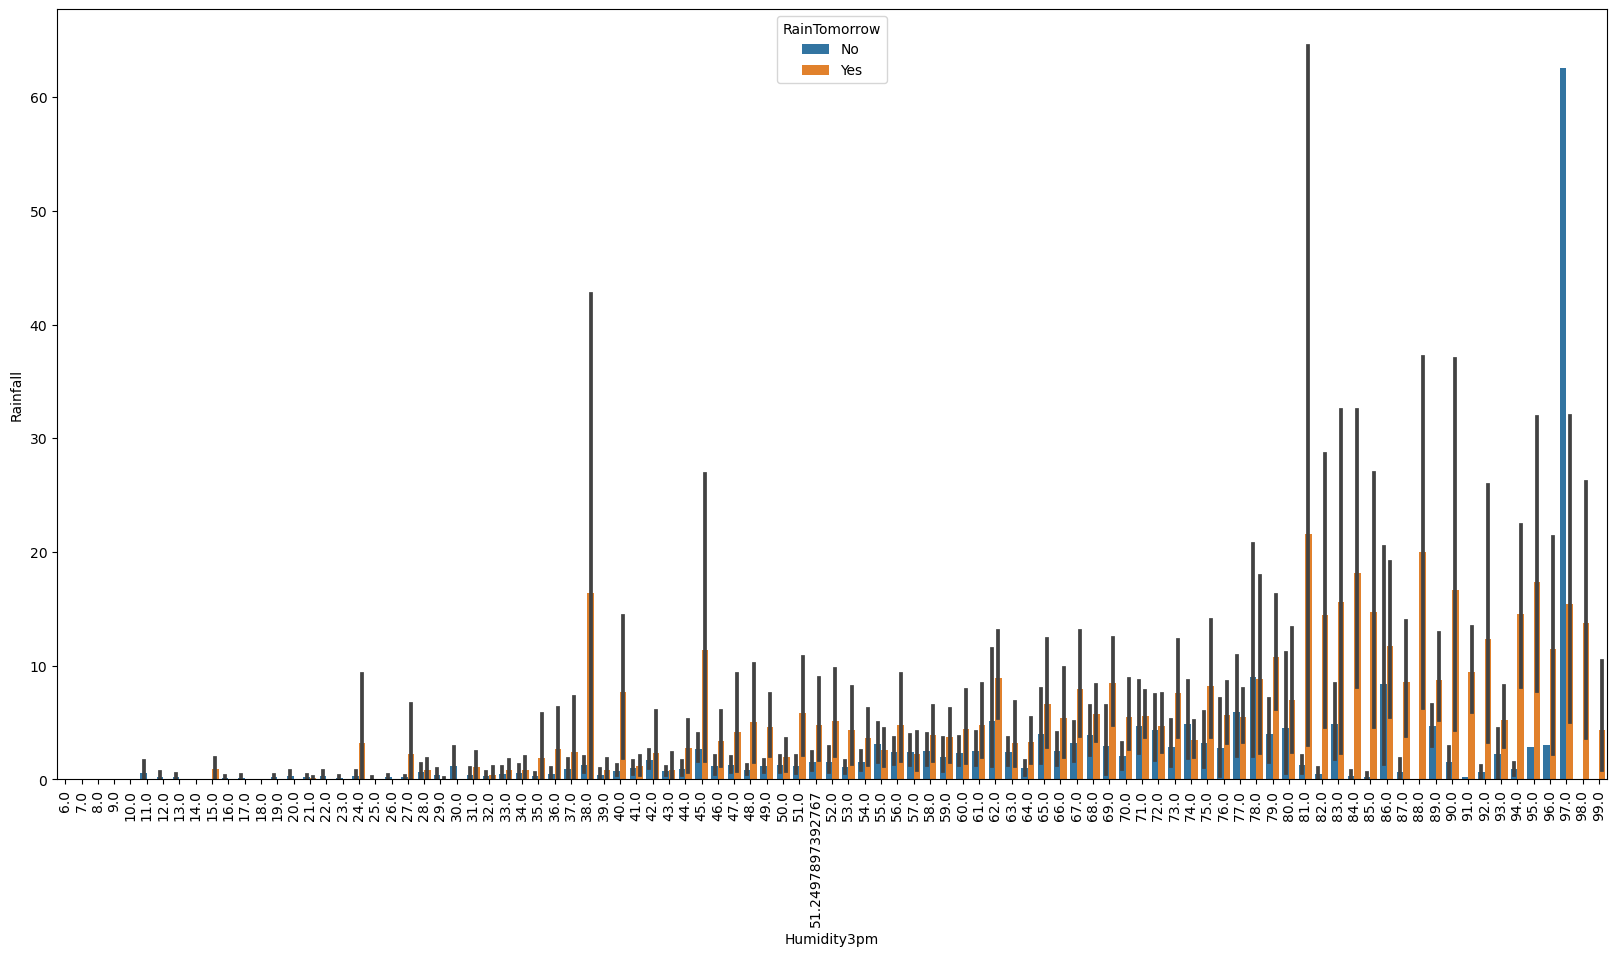

In [62]:
#comparing different features with target 
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
sns.barplot(x='Humidity3pm', y='Rainfall', hue='RainTomorrow', data=data)
plt.show()

Similar to humidity at 9am, the higher the humidity the higher chances of rainfall tomorrow

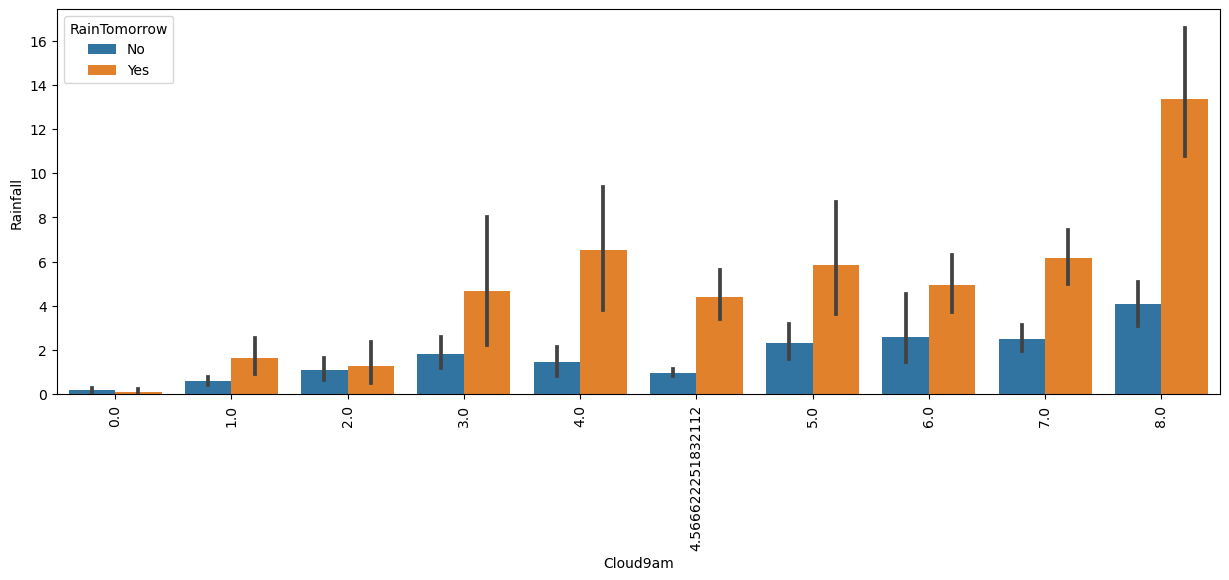

In [63]:
#comparing different features with target 
plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
sns.barplot(x='Cloud9am', y='Rainfall', hue='RainTomorrow', data=data)
plt.show()

The higher the cloud coverage the higher the probability is of rainfall

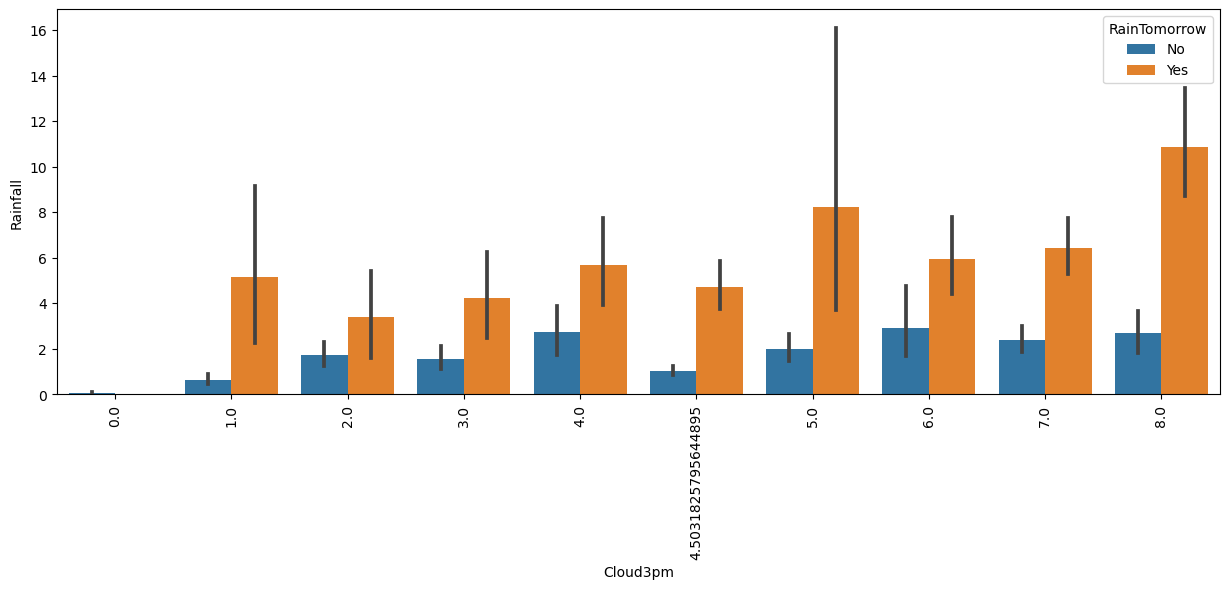

In [64]:
#comparing different features with target 
plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
sns.barplot(x='Cloud3pm', y='Rainfall', hue='RainTomorrow', data=data)
plt.show()

The highest chances of rainfall are when the cloud coverage is at its highest, however, if there is any cloud coverage there is a high chance of rain

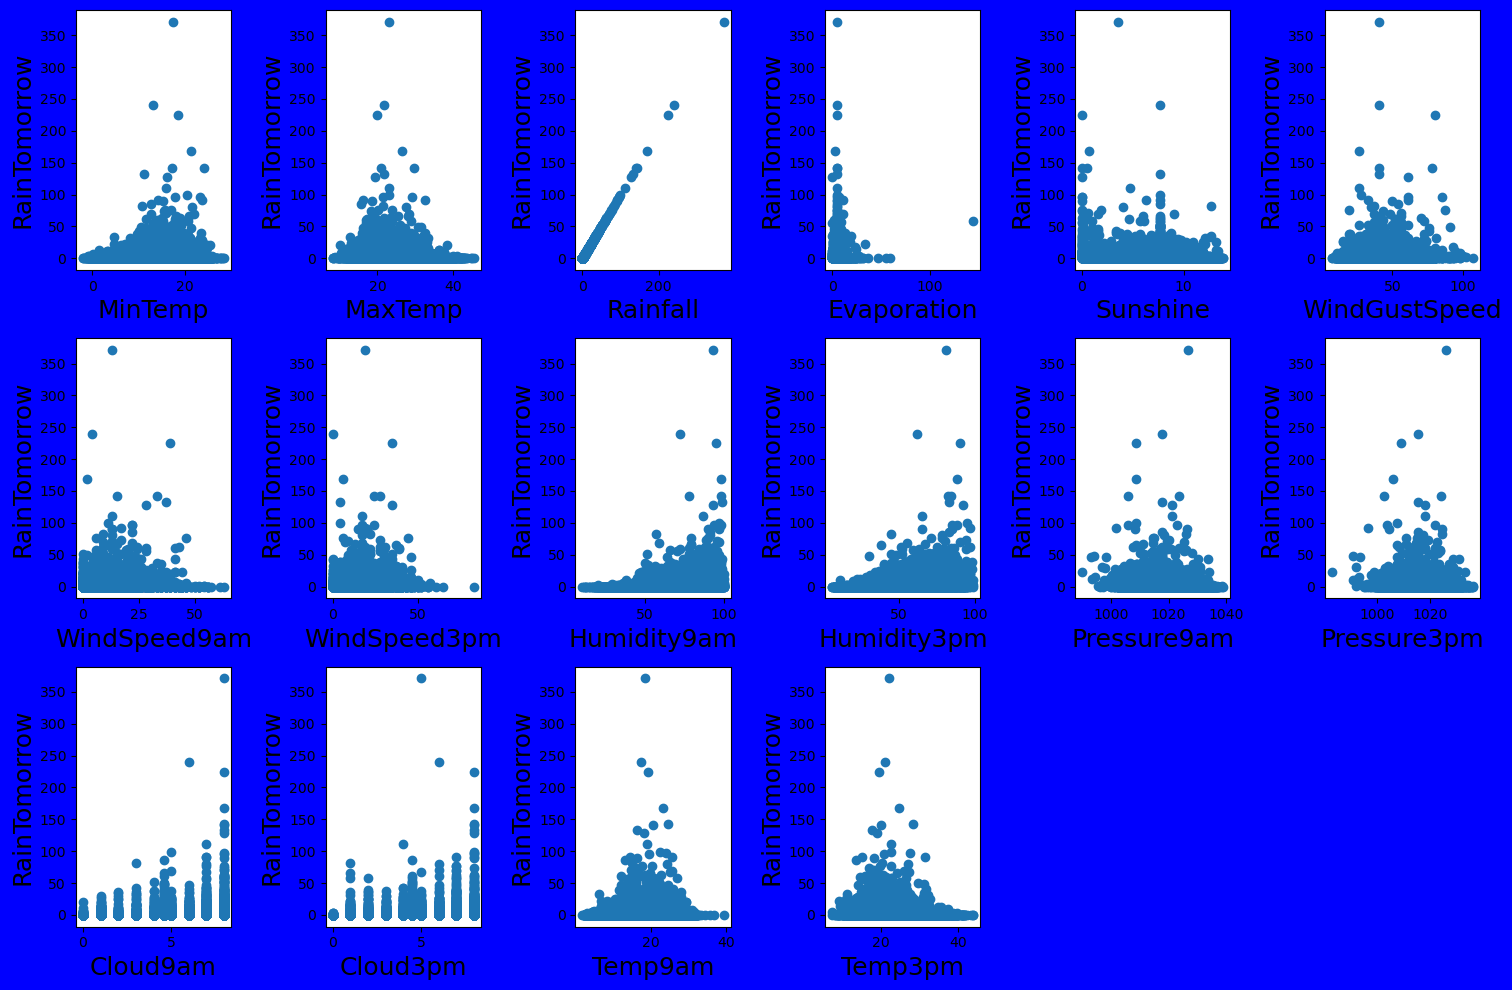

In [71]:
plt.figure(figsize=(15,10), facecolor='blue')
columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']
plotnumber=1
for column in columns:
    if plotnumber <=17:
        ax=plt.subplot(3,6,plotnumber)
        plt.scatter (data[column], data['Rainfall'])
        plt.xlabel(column, fontsize=18)
        plt.ylabel ('RainTomorrow', fontsize=18)
        plotnumber +=1
        plt.tight_layout()

MinTemp             AxesSubplot(0.125,0.786098;0.227941x0.0939024)
MaxTemp          AxesSubplot(0.398529,0.786098;0.227941x0.0939024)
Rainfall         AxesSubplot(0.672059,0.786098;0.227941x0.0939024)
Evaporation         AxesSubplot(0.125,0.673415;0.227941x0.0939024)
Sunshine         AxesSubplot(0.398529,0.673415;0.227941x0.0939024)
WindGustSpeed    AxesSubplot(0.672059,0.673415;0.227941x0.0939024)
WindSpeed9am        AxesSubplot(0.125,0.560732;0.227941x0.0939024)
WindSpeed3pm     AxesSubplot(0.398529,0.560732;0.227941x0.0939024)
Humidity9am      AxesSubplot(0.672059,0.560732;0.227941x0.0939024)
Humidity3pm         AxesSubplot(0.125,0.448049;0.227941x0.0939024)
Pressure9am      AxesSubplot(0.398529,0.448049;0.227941x0.0939024)
Pressure3pm      AxesSubplot(0.672059,0.448049;0.227941x0.0939024)
Cloud9am            AxesSubplot(0.125,0.335366;0.227941x0.0939024)
Cloud3pm         AxesSubplot(0.398529,0.335366;0.227941x0.0939024)
Temp9am          AxesSubplot(0.672059,0.335366;0.227941x0.0939

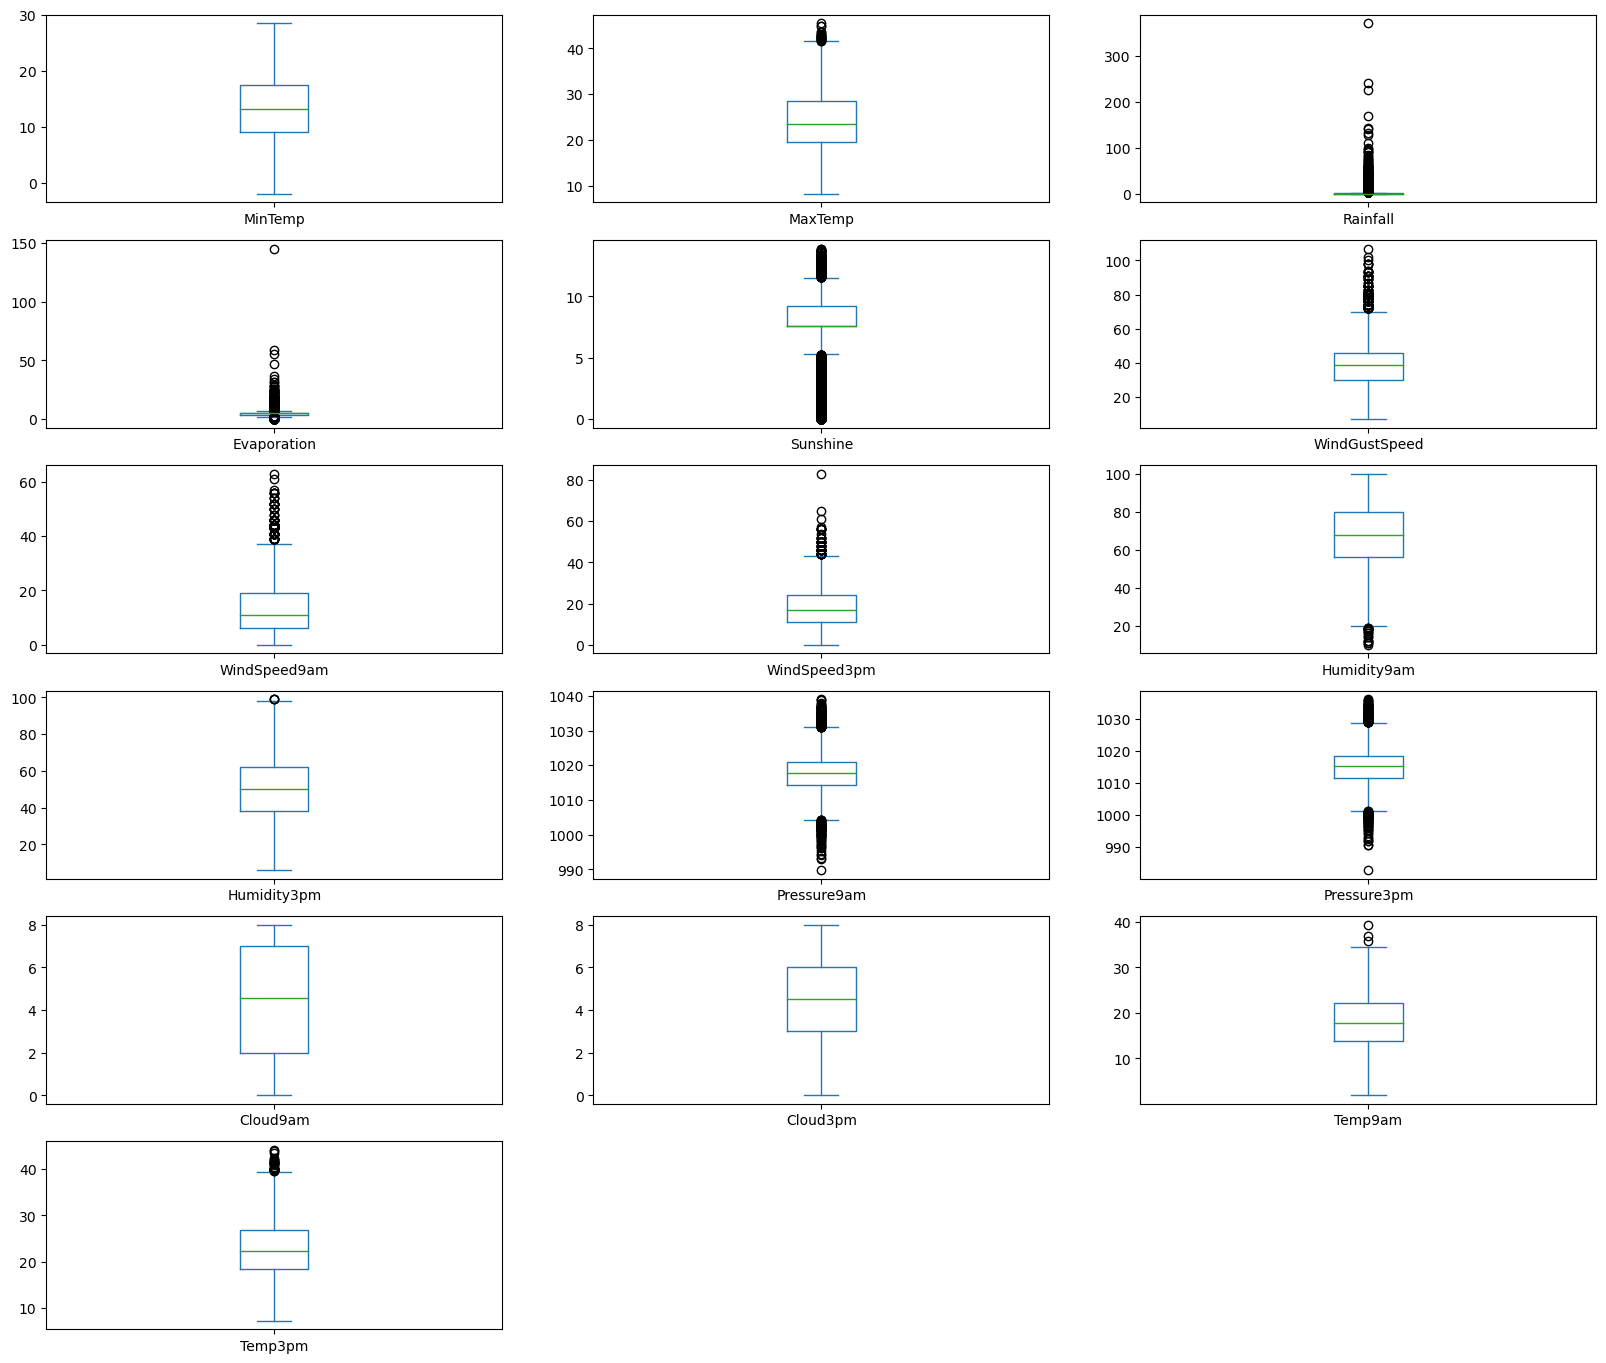

In [72]:
#Exploring outliers
data.plot(kind='box',subplots=True,layout=(7,3),figsize=(20,20))

Here it is evident that MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp3pm have outliers. I will use zscore or IQR method to address.

In [73]:
#Converting categorical features to numerical using label encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
columns_to_encode = ['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']

for i in columns_to_encode:
    data[i] = le.fit_transform(data[i])

In [74]:
data.dtypes

Date              object
Location           int32
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int32
WindGustSpeed    float64
WindDir9am         int32
WindDir3pm         int32
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int32
RainTomorrow       int32
dtype: object

Date is the only column with object left, which I may drop as I know date time format can disagree with some ML algorithms

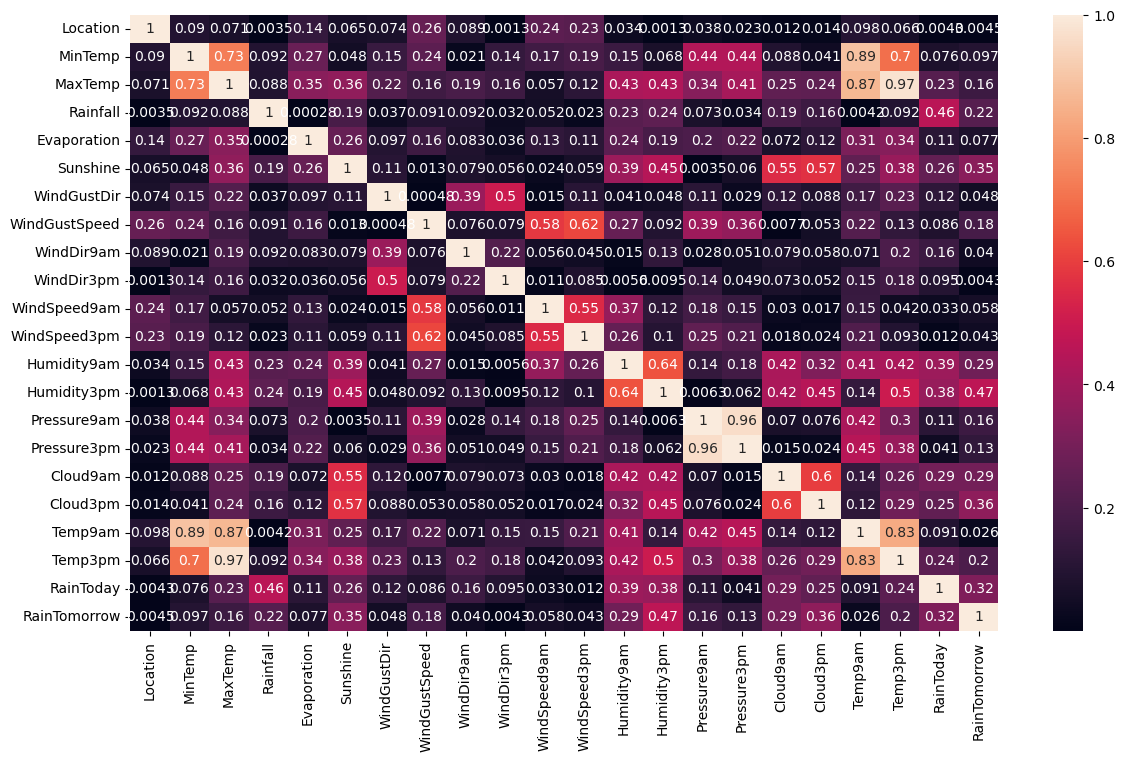

In [75]:
#Explore correlation
df_corr= data.corr().abs()
plt.figure (figsize=(14,8))
sns.heatmap(df_corr, annot=True,)
plt.show()

Here it is evident that the temperature-based features are highly correlated with each other. This is similar with the windspeed related features.Humidity and rain today seem to be highly correlated with the target

In [77]:
data.corr()['RainTomorrow'].sort_values()

Sunshine        -0.345379
Temp3pm         -0.202900
MaxTemp         -0.160218
Pressure9am     -0.159095
Pressure3pm     -0.131685
Evaporation     -0.076600
Temp9am         -0.025813
Location        -0.004506
WindDir3pm       0.004301
WindDir9am       0.040399
WindSpeed3pm     0.043186
WindGustDir      0.048487
WindSpeed9am     0.058026
MinTemp          0.097171
WindGustSpeed    0.184221
Rainfall         0.224217
Humidity9am      0.287796
Cloud9am         0.294176
RainToday        0.323691
Cloud3pm         0.356770
Humidity3pm      0.466750
RainTomorrow     1.000000
Name: RainTomorrow, dtype: float64

There is positive and negative correlation to the target. Sunshine having the highest negative correlation (unsurprisingly) and humidity3pm having the highest positive correlation

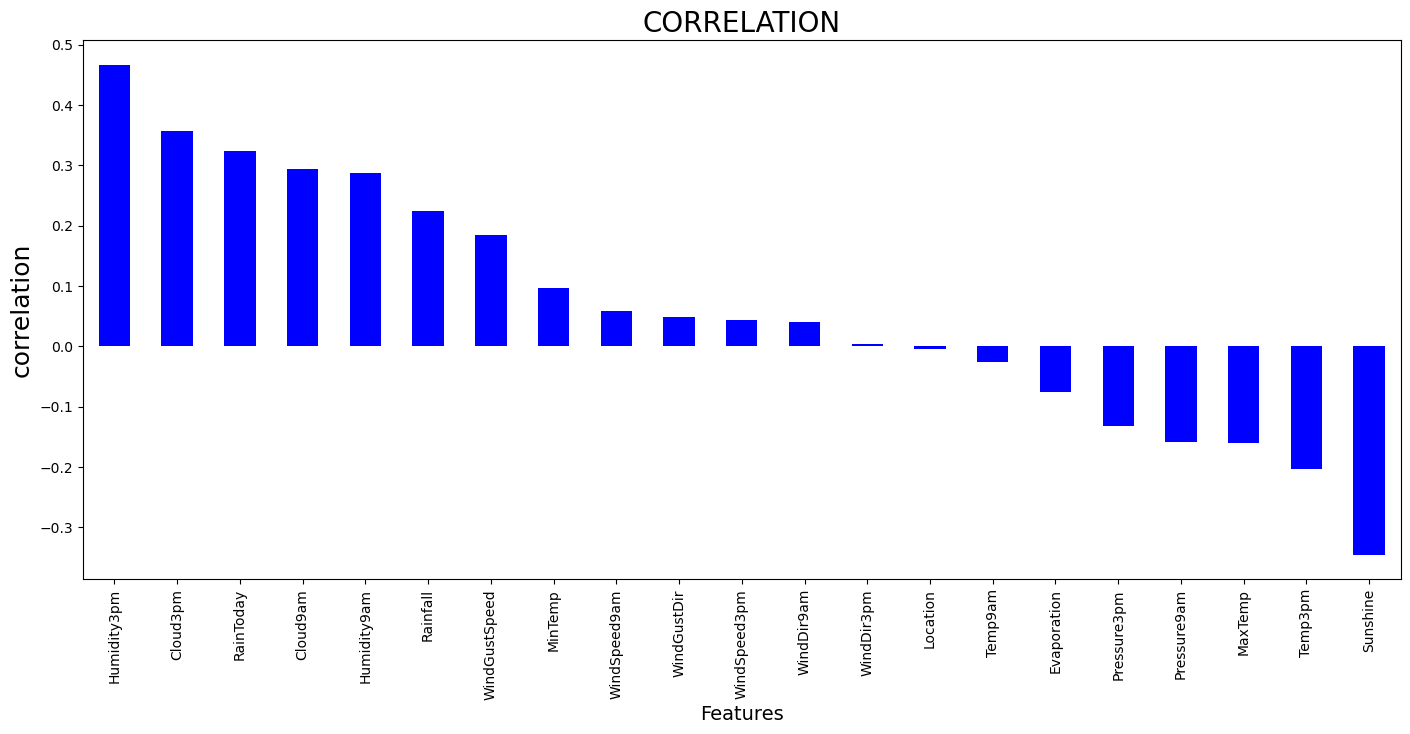

In [79]:
# Visualise positive or negative correlation 
plt.figure(figsize=(17,7))
data.corr()['RainTomorrow'].sort_values(ascending=False).drop(['RainTomorrow']).plot(kind='bar',color='b')
plt.xlabel('Features',fontsize=14)
plt.ylabel('correlation',fontsize=18)
plt.title('CORRELATION',fontsize=20)
plt.show()

I'm not going to drop any of the negatively correlated features as I believe they are still useful.

In [82]:
# Descriptive stats
data.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000
mean,5.323721,13.110016,24.096335,2.780674,5.339977,7.767098,7.028394,39.144388,7.013310,7.842798,12.792133,17.585384,67.509082,50.478258,1017.629004,1015.142442,4.400224,4.372235,17.894035,22.704947,0.232476,0.232476
std,3.099455,5.540673,6.130161,10.482770,3.343991,2.736693,4.790116,13.382876,4.550702,4.486894,9.788112,9.549341,17.182723,18.498573,6.027916,5.967815,2.476781,2.324720,5.722423,5.971925,0.422442,0.422442
min,0.000000,-2.000000,8.200000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,0.000000,0.000000
25%,2.250000,9.000000,19.600000,0.000000,4.000000,7.632205,3.000000,30.000000,3.000000,4.000000,6.000000,11.000000,56.000000,38.000000,1014.200000,1011.500000,2.000000,3.000000,13.900000,18.400000,0.000000,0.000000
50%,6.000000,13.193305,23.500000,0.000000,5.389395,7.632205,7.000000,39.000000,7.000000,9.000000,11.000000,17.000000,68.000000,50.000000,1017.640233,1015.236075,4.566622,4.503183,17.900000,22.300000,0.000000,0.000000
75%,8.000000,17.400000,28.400000,1.200000,5.389395,9.200000,12.000000,46.000000,11.000000,12.000000,19.000000,24.000000,80.000000,62.000000,1020.900000,1018.400000,7.000000,6.000000,22.200000,26.800000,0.000000,0.000000
max,11.000000,28.500000,45.500000,371.000000,145.000000,13.900000,15.000000,107.000000,15.000000,15.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,1.000000,1.000000


The range for evaporation is high- This may be reduced when outliers have been removed

In [85]:
# Dropping irrelevant columns
data.drop(columns=["Date"], axis=1, inplace=True)

In [86]:
#Using Zscore to remove outliers
data.shape

(6762, 22)

In [87]:
from scipy.stats import zscore
z=np.abs(zscore(data))
threshold=3
np.where(z>3)

(array([   8,   12,   12,   44,   44,   52,   52,   60,   60,   61,   61,
          62,   62,   62,   67,   68,   68,  123,  267,  271,  296,  381,
         381,  405,  406,  407,  431,  462,  466,  466,  563,  567,  568,
         568,  569,  602,  602,  603,  683,  683,  699,  713,  748,  748,
         770,  795,  796,  797,  802,  928,  928,  935,  949,  979,  980,
         980,  980, 1008, 1009, 1011, 1138, 1148, 1149, 1151, 1189, 1203,
        1237, 1241, 1264, 1265, 1357, 1411, 1412, 1413, 1479, 1480, 1481,
        1513, 1535, 1587, 1644, 1661, 1665, 1673, 1680, 1774, 1819, 1873,
        1898, 1903, 1945, 2016, 2028, 2043, 2074, 2108, 2116, 2186, 2201,
        2219, 2219, 2230, 2231, 2265, 2429, 2488, 2500, 2505, 2527, 2527,
        2541, 2593, 2676, 2677, 2735, 2827, 2835, 2849, 2849, 2855, 2859,
        2863, 2869, 2877, 2883, 2890, 2891, 2897, 2898, 2900, 2900, 2901,
        2905, 2909, 2911, 2919, 2925, 2933, 2939, 2947, 2953, 2961, 2967,
        2975, 2989, 3003, 3027, 3045, 

In [88]:
#Removing outliers
outliers = np.where(z > threshold)
outlier_rows = outliers[0]
data_new = data.drop(index=data.index[outlier_rows])

In [89]:
data_new.shape

(6409, 22)

In [90]:
Dataloss=((6762-6409)/6762)*100
Dataloss

5.220349009168885

5% data loss.

In [94]:
#removingskewness
data_new.skew()

Location         0.004558
MinTemp         -0.079583
MaxTemp          0.266849
Rainfall         3.514866
Evaporation      0.666495
Sunshine        -0.747742
WindGustDir      0.178714
WindGustSpeed    0.434313
WindDir9am       0.210848
WindDir3pm      -0.128886
WindSpeed9am     0.673887
WindSpeed3pm     0.336515
Humidity9am     -0.233515
Humidity3pm      0.156591
Pressure9am      0.062576
Pressure3pm      0.077866
Cloud9am        -0.279140
Cloud3pm        -0.212402
Temp9am         -0.071954
Temp3pm          0.292131
RainToday        1.331440
RainTomorrow     1.330358
dtype: float64

'Rainfall','Evaporation','Sunshine','WindSpeed9am' Are showing skew of 0.5 or more

In [95]:
data_new.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [96]:
#Using Yeojohnson to deal with skewness in non-categorical columns
from sklearn.preprocessing import PowerTransformer

columns_to_transform=['Rainfall','Evaporation','Sunshine','WindSpeed9am']          
PT = PowerTransformer(method='yeo-johnson')

data_new[columns_to_transform] = PT.fit_transform(data_new[columns_to_transform])


In [98]:
#Check the distribution after power transform 
data_new.skew()

Location         0.004558
MinTemp         -0.079583
MaxTemp          0.266849
Rainfall         0.970967
Evaporation      0.070907
Sunshine        -0.031067
WindGustDir      0.178714
WindGustSpeed    0.434313
WindDir9am       0.210848
WindDir3pm      -0.128886
WindSpeed9am    -0.133006
WindSpeed3pm     0.336515
Humidity9am     -0.233515
Humidity3pm      0.156591
Pressure9am      0.062576
Pressure3pm      0.077866
Cloud9am        -0.279140
Cloud3pm        -0.212402
Temp9am         -0.071954
Temp3pm          0.292131
RainToday        1.331440
RainTomorrow     1.330358
dtype: float64

Skewness has been reduced

In [99]:
#Separate into dependent and independent variables
x=data_new.drop (columns=['RainTomorrow'], axis=1)
y=data_new['RainTomorrow']

In [100]:
#Scaling data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(data_new)
x_scaled

array([[-1.39139642,  0.06901307, -0.19046798, ..., -0.1489768 ,
        -0.53567508, -0.53591629],
       [-1.39139642, -1.01398407,  0.1746899 , ...,  0.27706816,
        -0.53567508, -0.53591629],
       [-1.39139642, -0.02123669,  0.27427842, ...,  0.08960838,
        -0.53567508, -0.53591629],
       ...,
       [ 1.20333978, -1.37498311,  0.47345544, ...,  0.58382054,
        -0.53567508, -0.53591629],
       [ 1.20333978, -0.94178426,  0.49005353, ...,  0.56677874,
        -0.53567508, -0.53591629],
       [ 1.20333978,  0.33976236, -0.03113033, ..., -0.30235299,
        -0.53567508, -0.53591629]])

In [103]:
#Based on correlation heatmap, there could be a possibility of multicolinearity. I will check this with VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [104]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["FEATURES"]=x.columns
    print (vif)

In [105]:
vif_cal()

       VIF FACTOR       FEATURES
0        4.549609       Location
1       58.811115        MinTemp
2      444.805940        MaxTemp
3        5.310691       Rainfall
4        1.583028    Evaporation
5        2.164213       Sunshine
6        5.035094    WindGustDir
7       21.219705  WindGustSpeed
8        4.561010     WindDir9am
9        5.931148     WindDir3pm
10       1.943687   WindSpeed9am
11       8.821357   WindSpeed3pm
12      69.905963    Humidity9am
13      46.392375    Humidity3pm
14  617316.196559    Pressure9am
15  616505.819131    Pressure3pm
16       8.269033       Cloud9am
17       8.608665       Cloud3pm
18     189.881167        Temp9am
19     514.532902        Temp3pm
20       6.231563      RainToday


Considering a VIF>10 is high, then the majority of columns have a problem with multicolinearity

In [109]:
#Dropping highest multicorelated features 
x.drop('Temp9am',axis=1,inplace=True)

In [108]:
#Dropping highest multicorelated features 
x.drop('Pressure9am',axis=1,inplace=True)

In [110]:
vif_cal()

    VIF FACTOR       FEATURES
0     4.514566       Location
1    33.781234        MinTemp
2   432.202851        MaxTemp
3     5.289328       Rainfall
4     1.555696    Evaporation
5     2.127472       Sunshine
6     4.995146    WindGustDir
7    21.006476  WindGustSpeed
8     4.481787     WindDir9am
9     5.712135     WindDir3pm
10    1.910726   WindSpeed9am
11    8.543002   WindSpeed3pm
12   46.041983    Humidity9am
13   33.986112    Humidity3pm
14  144.691994    Pressure3pm
15    8.198939       Cloud9am
16    8.606995       Cloud3pm
17  473.976554        Temp3pm
18    6.220737      RainToday


In [111]:
# Removing other multi corelated features

x.drop('MaxTemp', axis=1,inplace=True)

In [112]:
vif_cal()

    VIF FACTOR       FEATURES
0     4.513133       Location
1    33.517716        MinTemp
2     5.287678       Rainfall
3     1.551873    Evaporation
4     2.124998       Sunshine
5     4.985926    WindGustDir
6    20.844907  WindGustSpeed
7     4.476485     WindDir9am
8     5.707133     WindDir3pm
9     1.898658   WindSpeed9am
10    8.539274   WindSpeed3pm
11   44.163721    Humidity9am
12   31.932408    Humidity3pm
13  144.525461    Pressure3pm
14    8.154008       Cloud9am
15    8.509174       Cloud3pm
16  100.797776        Temp3pm
17    6.220323      RainToday


In [115]:
x.drop('Pressure3pm',axis=1,inplace=True)

In [116]:
vif_cal()

    VIF FACTOR       FEATURES
0     4.457281       Location
1    20.068542        MinTemp
2     5.077888       Rainfall
3     1.488301    Evaporation
4     2.106349       Sunshine
5     4.948501    WindGustDir
6    18.636372  WindGustSpeed
7     4.140018     WindDir9am
8     5.600572     WindDir3pm
9     1.734593   WindSpeed9am
10    8.535651   WindSpeed3pm
11   12.296806    Humidity3pm
12    7.513299       Cloud9am
13    8.410842       Cloud3pm
14   32.747147        Temp3pm
15    6.153253      RainToday


In [117]:
x.drop('WindGustSpeed',axis=1,inplace=True)

In [118]:
vif_cal()

    VIF FACTOR      FEATURES
0     4.357182      Location
1    19.736456       MinTemp
2     5.077881      Rainfall
3     1.477528   Evaporation
4     2.104655      Sunshine
5     4.934809   WindGustDir
6     4.118724    WindDir9am
7     5.449906    WindDir3pm
8     1.626751  WindSpeed9am
9     6.610287  WindSpeed3pm
10   11.783803   Humidity3pm
11    7.513297      Cloud9am
12    8.329116      Cloud3pm
13   28.476741       Temp3pm
14    6.132632     RainToday


Still high but considerably better. I am worried that I will remove too much data if I continue.

In [119]:
#Split data into Xtrain/test and ytrain/test
x_train, x_test, y_train, y_test= train_test_split (x,y, test_size= 0.2, random_state= 3)

In [120]:
#importing ML libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report


In [121]:
from sklearn.model_selection import cross_val_score
lr = LogisticRegression()
cv = cross_val_score(lr,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.81578947 0.81773879 0.83219512 0.81365854 0.83121951]
0.822120287167784


Promising scores from logistic regression

In [122]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.81871345 0.83235867 0.84487805 0.82341463 0.84780488]
0.8334339371463889


Random Forest marginally better than logistic regression

In [123]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(random_state =1)
cv = cross_val_score(dt,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.75243665 0.74658869 0.77170732 0.76       0.76097561]
0.7583416535919744


Lower than both previous models

In [124]:
KNN= KNeighborsClassifier()
cv = cross_val_score(KNN,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.8079922  0.82066277 0.82439024 0.81365854 0.8302439 ]
0.8193895307374126


Good, but Random Forest was highest. 

In [125]:
#Finding best params
from sklearn.metrics import make_scorer

rf = RandomForestClassifier()

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(rf, param_grid_rf, scoring=make_scorer(accuracy_score), cv=5)
grid_search_rf.fit(x_train, y_train)
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_
best_model_rf = grid_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Best Random Forest Model - Hyperparameters: {best_params_rf}, Accuracy: {accuracy_rf}")


Best Random Forest Model - Hyperparameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 300}, Accuracy: 0.8463338533541341


In [126]:
rf=RandomForestClassifier(n_estimators= 300, max_depth= 20, min_samples_split=5)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=300)

In [127]:
y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Random Forest Model - Accuracy: {accuracy}")

Random Forest Model - Accuracy: 0.8525741029641186


85% accuracy is good

In [128]:
from sklearn.metrics import classification_report
print ( classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1002
           1       0.77      0.46      0.58       280

    accuracy                           0.85      1282
   macro avg       0.82      0.71      0.74      1282
weighted avg       0.84      0.85      0.84      1282



In [130]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

x= data.drop (columns= ['RainTomorrow'])
y= data ['RainTomorrow']
rf = RandomForestClassifier()

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42) 
accuracy_scores = []
for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rf.fit(x_train, y_train)

    y_pred = rf.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

mean_accuracy = sum(accuracy_scores) / n_splits
print(f"Mean Accuracy: {mean_accuracy:.2f}")


Mean Accuracy: 0.84


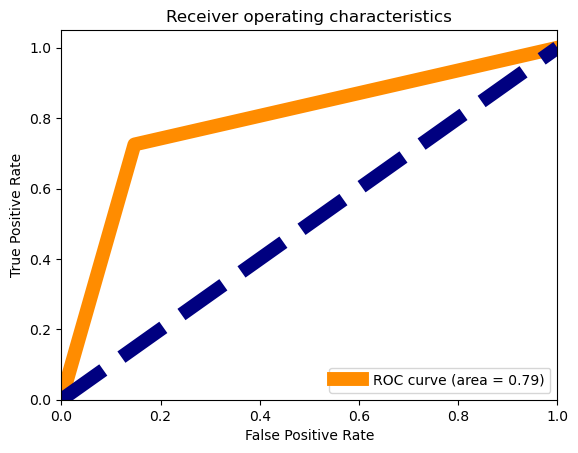

In [131]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,threshold=roc_curve(y_pred,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

In [132]:
compare={"Actual": y_test, "Predict": y_pred}
pd.DataFrame(compare)

,Actual,Predict
3,0,0
4,0,0
5,0,0
9,0,0
16,1,1
...,...,...
8399,0,0
8402,0,0
8409,0,0
8411,0,0


In [133]:
import pickle
filename= 'RainTomorrow.pkl'
pickle.dump(rf, open(filename,'wb'))
loaded_model= pickle.load(open('RainTomorrow.pkl', 'rb'))

First part of the problem statement solved.

Target for the second portion of the problem will be looking at the amount of rainfall

In [135]:
data_new.head(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,13.4,22.9,0.685440,0.171997,-0.155572,13,44.0,13,14,0.904165,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0
1,1,7.4,25.1,-0.674930,0.171997,-0.155572,14,44.0,6,15,-0.859874,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0
2,1,12.9,25.7,-0.674930,0.171997,-0.155572,15,46.0,13,15,0.821577,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0
3,1,9.2,28.0,-0.674930,0.171997,-0.155572,4,24.0,9,0,0.065993,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0
4,1,17.5,32.3,1.045239,0.171997,-0.155572,13,41.0,1,7,-0.412396,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0


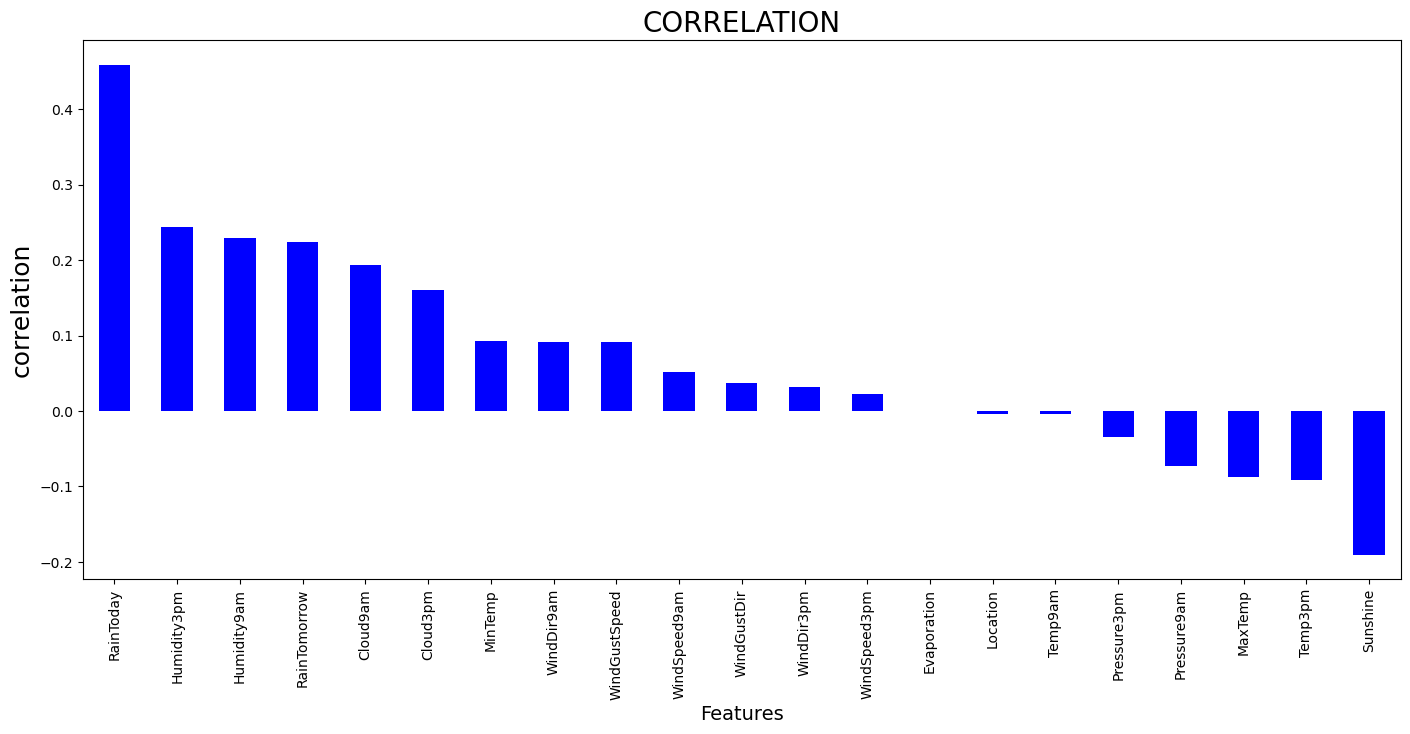

In [136]:
#Much of the preprocessing is complete. Will now explore correlation between features and new target
plt.figure(figsize=(17,7))
data.corr()['Rainfall'].sort_values(ascending=False).drop(['Rainfall']).plot(kind='bar',color='b')
plt.xlabel('Features',fontsize=14)
plt.ylabel('correlation',fontsize=18)
plt.title('CORRELATION',fontsize=20)
plt.show()

Very similar to previous target. The 'Raintoday' is the highest positively correlated feature and Sunshine is the highest negatively correlated feature

In [137]:
#Separate into dependent and independent variables
x1 = data_new.drop("Rainfall", axis=1)
y1 = data_new["Rainfall"]

In [139]:
data_new.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,6409.000000,6409.000000,6409.000000,6.409000e+03,6.409000e+03,6.409000e+03,6409.000000,6409.000000,6409.000000,6409.000000,6.409000e+03,6409.000000,6409.000000,6409.000000,6409.000000,6409.000000,6409.000000,6409.000000,6409.000000,6409.000000,6409.000000,6409.000000
mean,5.289905,13.017655,24.047530,1.183360e-15,5.281831e-16,2.068360e-15,7.020596,38.250697,7.012326,7.848026,2.512977e-15,17.153820,67.624187,50.403609,1017.768110,1015.267363,4.363789,4.331129,17.824117,22.674185,0.222968,0.223124
std,3.083406,5.540613,6.025261,1.000078e+00,1.000078e+00,1.000078e+00,4.789405,12.265507,4.546542,4.478796,1.000078e+00,9.068294,16.926714,18.206526,5.719866,5.667883,2.476865,2.322381,5.687165,5.868383,0.416269,0.416373
min,0.000000,-2.000000,8.200000,-6.749302e-01,-2.876933e+00,-2.374186e+00,0.000000,7.000000,0.000000,0.000000,-1.801284e+00,0.000000,16.000000,6.000000,999.700000,997.600000,0.000000,0.000000,1.900000,7.300000,0.000000,0.000000
25%,2.000000,8.900000,19.600000,-6.749302e-01,-4.729614e-01,-1.555716e-01,3.000000,30.000000,3.000000,4.000000,-5.502013e-01,9.000000,56.000000,38.000000,1014.500000,1011.800000,2.000000,2.000000,13.800000,18.400000,0.000000,0.000000
50%,6.000000,13.193305,23.600000,-6.749302e-01,1.719972e-01,-1.555716e-01,7.000000,39.000000,7.000000,9.000000,6.599333e-02,17.000000,68.000000,50.000000,1017.640233,1015.236075,4.566622,4.503183,17.800000,22.300000,0.000000,0.000000
75%,8.000000,17.300000,28.300000,1.045239e+00,1.719972e-01,4.875517e-01,12.000000,44.000000,11.000000,12.000000,8.215765e-01,24.000000,80.000000,62.000000,1020.900000,1018.400000,7.000000,6.000000,22.100000,26.700000,0.000000,0.000000
max,11.000000,28.300000,42.000000,1.855775e+00,3.829951e+00,2.690469e+00,15.000000,78.000000,15.000000,15.000000,2.318840e+00,46.000000,100.000000,99.000000,1035.700000,1033.000000,8.000000,8.000000,34.500000,40.500000,1.000000,1.000000


In [140]:
data.head(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,13.4,22.9,0.6,5.389395,7.632205,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0
1,1,7.4,25.1,0.0,5.389395,7.632205,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0
2,1,12.9,25.7,0.0,5.389395,7.632205,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0
3,1,9.2,28.0,0.0,5.389395,7.632205,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0
4,1,17.5,32.3,1.0,5.389395,7.632205,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0


As rainfall is conitnuous, a regression model such as linear regression could be appropriate

In [142]:
#Split data into Xtrain/test and ytrain/test
x1_train, x1_test, y1_train, y1_test= train_test_split (x1,y1, test_size= 0.2, random_state= 3)

In [145]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
regression = LinearRegression()
regression.fit(x1_train, y1_train)
pred_train=regression.predict(x1_train)
pred=regression.predict(x1_test)
r2=r2_score(y1_test, pred)
print ('R2=:',r2)

R2=: 0.7990261222310502


In [147]:
print('R2 score on training data:',r2_score(y1_train, pred_train)*100 )
print('Mean absolute error:',mean_absolute_error(y1_test, pred) )
print('Mean squared error:',mean_squared_error(y1_test, pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y1_test, pred)))

R2 score on training data: 81.58354941733069
Mean absolute error: 0.2840218413202685
Mean squared error: 0.2098257294291726
Root mean squared error: 0.4580673852493458


In [148]:
import pickle
filename='Rainfall.pkl'
pickle.dump(regression, open(filename, 'wb'))

In [149]:
import pickle
loaded_model=pickle.load(open('Rainfall.pkl', 'rb'))
result=loaded_model.score(x1_test,y1_test)
print(result*100)

79.90261222310502


Approximately 80% is good score. Regression aspect completed. 